# Ejemplo de modelo autoregresivo
En este script se generará una serie de tiempo con un modelo autoregresivo y ajustaremos un modelo de esta familia para verificar los coeficientes

In [1]:
# import de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:

# Fijamos la semilla para reproducibilidad
np.random.seed(42)

# Generación de una serie de tiempo autorregresiva de orden 5
n = 100  # Número de observaciones
ar_order = 5

# Coeficientes AR originales
true_coefficients = np.array([0.5, -0.3, 0.2, 0.1, 0.1])

# Generamos un ruido blanco
noise = np.random.normal(0, 1, n)

# Inicializamos la serie de tiempo
time_series = np.zeros(n)

# Generamos la serie de tiempo
for t in range(ar_order, n):
    time_series[t] = (true_coefficients @ time_series[t-ar_order:t][::-1]) + noise[t]

# Pasamos a un DataFrame
dates = pd.date_range(start='2020-01-01', periods=n, freq='M')
series_df = pd.DataFrame(time_series, index=dates, columns=['Value'])
series_df

C:\Users\alonso.sandoval\AppData\Local\Temp\ipykernel_23408\3201867776.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=n, freq='M')


,Value
2020-01-31,0.000000
2020-02-29,0.000000
2020-03-31,0.000000
2020-04-30,0.000000
2020-05-31,0.000000
...,...
2027-12-31,-1.313568
2028-01-31,-0.277640
2028-02-29,0.320881
2028-03-31,-0.142905


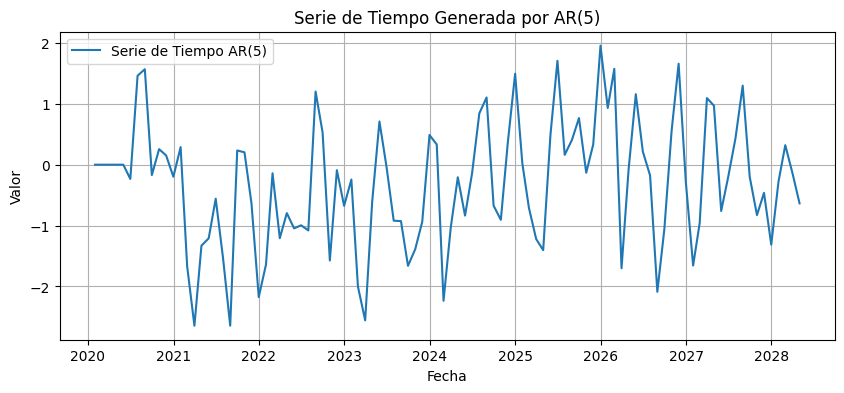

In [3]:

# Graficar la serie de tiempo
plt.figure(figsize=(10, 4))
plt.plot(series_df, label='Serie de Tiempo AR(5)')
plt.title('Serie de Tiempo Generada por AR(5)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.show()


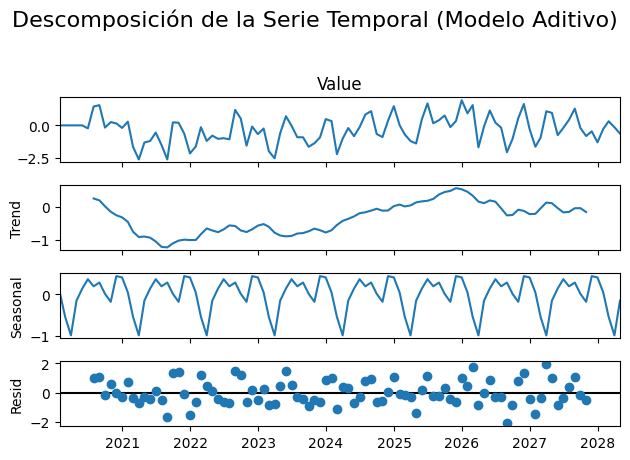

In [5]:

# Descomposición de la serie temporal
result = seasonal_decompose(series_df['Value'], model='additive', period=12)
fig = result.plot()
plt.suptitle('Descomposición de la Serie Temporal (Modelo Aditivo)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


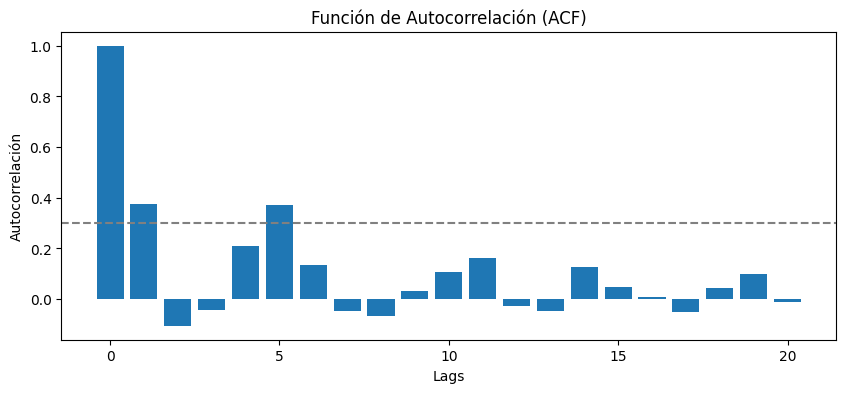

In [8]:

# Graficar la ACF
lag_acf = acf(series_df['Value'], nlags=20)
plt.figure(figsize=(10, 4))
plt.bar(range(len(lag_acf)), lag_acf)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.axhline(y=0.3, linestyle='--', color='gray')
plt.show()


In [9]:

# Ajustar un modelo AR al conjunto de datos
model = AutoReg(series_df['Value'], lags=ar_order).fit()

# Mostrar coeficientes
print("Coeficientes originales:", true_coefficients)
print("Coeficientes ajustados del modelo AR:")
print(model.params[1:])  # Excluyendo la constante


Coeficientes originales: [ 0.5 -0.3  0.2  0.1  0.1]
Coeficientes ajustados del modelo AR:
Value.L1    0.446615
Value.L2   -0.302518
Value.L3    0.118436
Value.L4    0.056626
Value.L5    0.260167
dtype: float64
